### Medium - Visualização de Dados

**OBS:** Estarei utilizando ponto e vírgula (;) na última linha de cada plotagem para remover os textos inline indesejados do matplotlib.

In [56]:
# Configuração Inicial
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### Gráficos de Barras

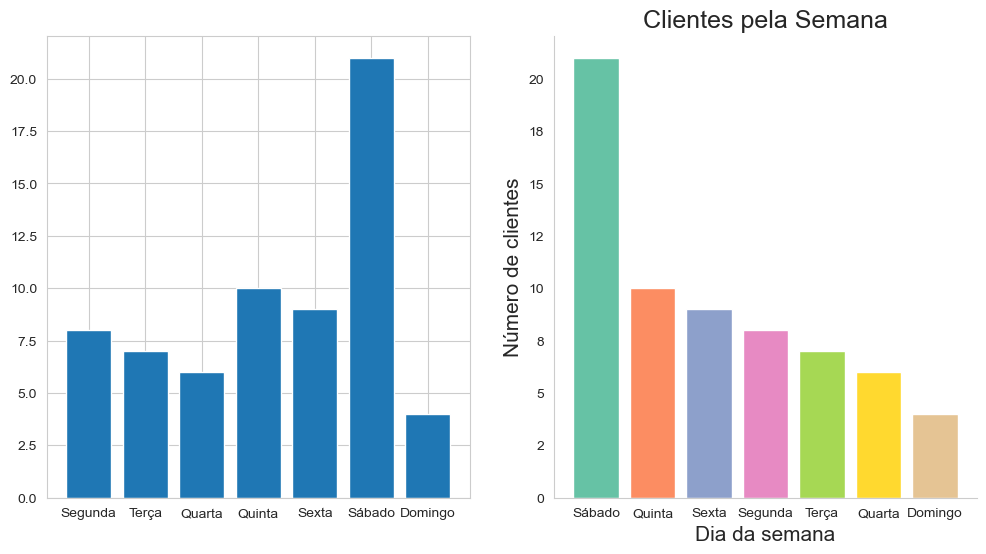

In [57]:
dados = {
    "Segunda": 8, "Terça": 7, "Quarta": 6, "Quinta": 10,
    "Sexta": 9, "Sábado": 21, "Domingo": 4
}

#  Para fim de leitura do notebook, será criado um subplot para visualização de ambos gráficos.
fig = plt.figure(figsize=(12,6))
#  1.º Gráfico:
ax1 = fig.add_subplot(121)
plt.bar(
    x=dados.keys(), height=dados.values()
)

#  2.º Gráfico:
dados_ordenado = sorted(dados.items(), key=lambda x: x[1], reverse=True)
dados_ordenado = dict(dados_ordenado)
paleta = plt.get_cmap("Set2")
ax2 = fig.add_subplot(122)

plt.bar(
    x=dados_ordenado.keys(),
    height=dados_ordenado.values(),
    color=paleta.colors)

plt.title("Clientes pela Semana", fontsize=18)
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Número de clientes", fontsize=15)
plt.grid(False)

#  Formatação do ticklabels do eixo Y, e remoção das linhas externas.
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

### Boxplots confusos

Abaixo, a criação das distribuições de probabilidade, usando ***numpy.random***, ***for loop*** para criar a assimetria e então a plotagem.

In [58]:
np.random.seed(0)  # Para repetibilidade

#  Geração de uma lista com elementos normalizados.
aleatorios_normais = np.random.standard_normal(size=1000)

# Aplicando limite superior e inferior
dados_normais = [i for i in aleatorios_normais if 2.5 > i > -2.5]

# Criando um vão entre 0,1 e 0,5.
dados_assimetricos = []
for valor in dados_normais:
    if 0.5 > valor > 0.1:
        dados_assimetricos.append(0.65)
    #  Ajustando medidas de tendência central
    elif -0.6 < valor < -0.5:
        dados_assimetricos.append(-0.65)
    else:
        dados_assimetricos.append(valor)

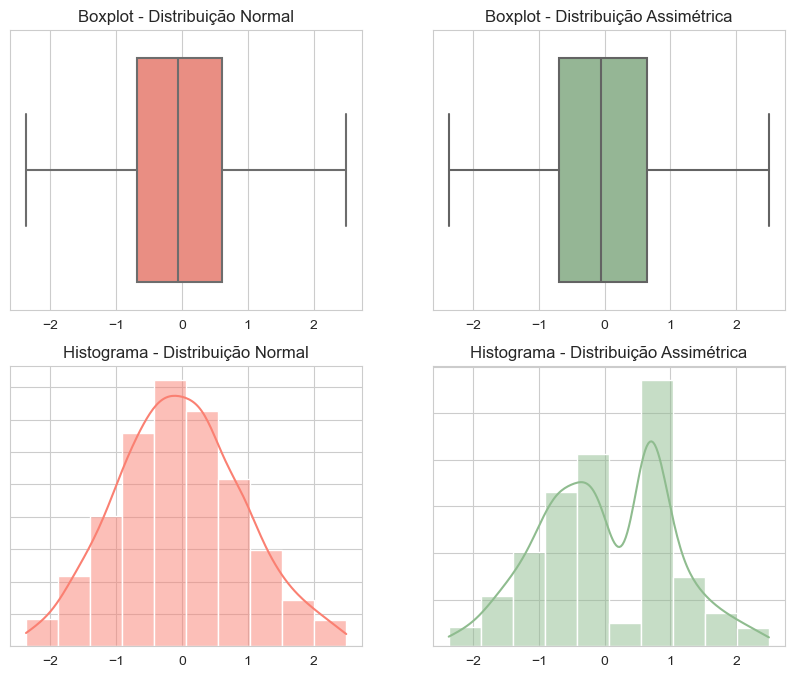

In [59]:
#  Criação de espaço gráfico
plt.figure(figsize=(10,8))

#  Plotagem da distribuição normal
plt.subplot(221)
sns.boxplot(
    dados_normais, orient="h", color="salmon").set(
    title="Boxplot - Distribuição Normal", yticklabels=[])

plt.subplot(223)
sns.histplot(
    dados_normais, color="salmon", bins=10, kde=True).set(
    title="Histograma - Distribuição Normal", 
    yticklabels=[], ylabel="")


#  Plotagem da distribuição assimétrica
plt.subplot(222)
sns.boxplot(
    dados_assimetricos, orient="h", color="darkseagreen").set(
    title="Boxplot - Distribuição Assimétrica", yticklabels=[])

plt.subplot(224)
sns.histplot(
    dados_assimetricos, color="darkseagreen", bins=10, kde=True).set(
    title="Histograma - Distribuição Assimétrica",
    yticklabels=[], ylabel="");

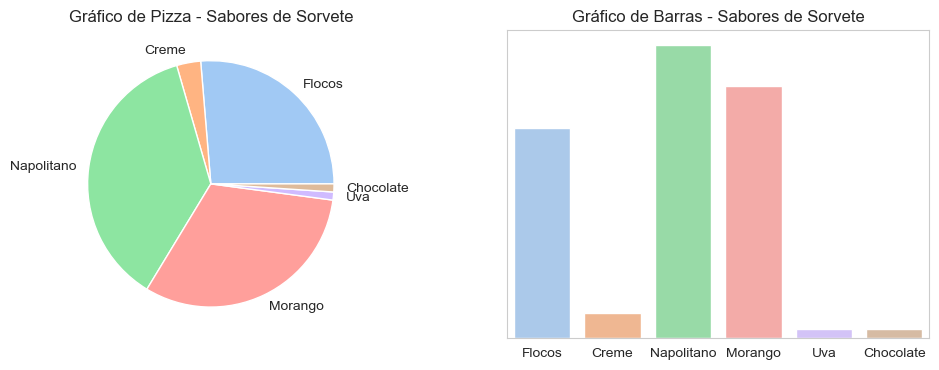

In [60]:
#  Criação de dados fictícios e separação em listas para plotagem.
vendas = {
    "Flocos": 25, "Creme": 3, "Napolitano": 35,  
    "Morango": 30, "Uva":1, "Chocolate": 1
}

paleta_cores = sns.color_palette("pastel")
nome_vendas = list(vendas.keys())
quantidade_vendas = list(vendas.values())

#  Criação de espaço gráfico
plt.figure(figsize=(12,4))

#  Gráfico de Pizza
plt.subplot(121)
plt.pie(quantidade_vendas, labels=nome_vendas,colors=paleta_cores)
plt.title("Gráfico de Pizza - Sabores de Sorvete")

#  Gráfico de Barras
plt.subplot(122)
plt.grid(False)  # Retirar a visualização em grades.
fig,ax = sns.barplot(
    x=nome_vendas, y=quantidade_vendas,palette=paleta_cores).set(
    title="Gráfico de Barras - Sabores de Sorvete", yticklabels=[])